In [1]:
# PYTHON 3.10.12

from IPython.display import Image #IPython
import cv2 # 4.8.0
import numpy as np # 1.23.5
import pandas as pd # 1.5.3
import matplotlib.pyplot as plt # 3.7.1
import seaborn as sns # 0.12.2
from scipy.cluster.hierarchy import dendrogram, linkage # 1.11.3

In [2]:
from processing_funcs import image_paths
import os

# base level of project
base_dir = os.path.dirname(os.getcwd())

# data directory
data_dir = os.path.join(base_dir, 'data')

# nightly image dir
nightly_image_path = os.path.join(data_dir, 'NightlyImagesforData2023')

# make sure these match folder names!
dates_of_interest = ['7_07', '7_08', '7_09', '7_10', '7_11', '7_12', '7_13']

image_paths_list, folder_names = image_paths(path=nightly_image_path, folder_names=dates_of_interest)

In [3]:
from processing_funcs import image_process, image_data
import shutil

# a list of all of our column names
column_names = [
        'id', 'box_SA', 'cont_SA', 'B_avg', 'G_avg', 'R_avg', 'B_dom', 'G_dom',
        'R_dom', 'B_cont_mean', 'G_cont_mean', 'R_cont_mean', 'H_cont_mean',
        'S_cont_mean', 'V_cont_mean', 'H_diff_180', 'h_0.0', 'h_21.2', 'h_42.4',
        'h_63.5', 'h_84.7', 'h_105.9', 'h_127.1', 'h_148.2', 'h_169.4',
        'h_190.6', 'h_211.8', 'h_232.9', 'h_254.1', 'h_275.3', 'h_296.5',
        'h_317.6', 'h_338.8']
# initialize empty data frame
df = pd.DataFrame(None, columns=column_names)

# iterate over all image paths and folder names
for image_path, folder_name in zip(image_paths_list, folder_names):
    
    # read in image from path
    original_image = cv2.imread(image_path)
    # prep new path for sub
    sub_image_dir = os.path.join(os.path.dirname(image_path), 'sub_images')
    # if sub image dir already exist, remove it
    if os.path.isdir(sub_image_dir):
        shutil.rmtree(sub_image_dir)
    # make sub image directory
    os.makedirs(sub_image_dir)
     # change directory to image path
    os.chdir(sub_image_dir)
    # crop image and get not mask (see processing_funcs.py for details)
    cropped_img, cropped_notmask = image_process(original_image)
    # identify moths/large contours and get data on them (see processing_funcs.py)
    df_i = image_data(cropped_img, cropped_notmask, folder_name)
    # combine data from this image with rest of the data
    df = pd.concat([df,df_i], axis=0).reset_index(drop=True)

# display first few rows of data to check it
df.head()
    

,id,box_SA,cont_SA,B_avg,G_avg,R_avg,B_dom,G_dom,R_dom,B_cont_mean,...,h_169.4,h_190.6,h_211.8,h_232.9,h_254.1,h_275.3,h_296.5,h_317.6,h_338.8,notes
0,7_13_14,11044,3595.5,195.671496,123.481800,137.259870,190.547775,118.609009,132.117844,181.082903,...,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,
1,7_13_33,6000,3417.5,128.006833,127.101833,150.420333,185.549042,150.696152,166.098984,93.098867,...,0.0,0.0,0.0,0.001500,0.297167,0.048333,0.027167,0.033000,0.057000,
2,7_13_36,8610,3414.0,137.167480,122.832056,150.287340,200.933716,148.406860,165.499710,86.282898,...,0.0,0.0,0.0,0.006156,0.374100,0.032404,0.021603,0.043670,0.096980,
3,7_13_48,7480,3343.0,123.995187,120.698262,144.273529,85.323021,107.629929,132.381943,85.106560,...,0.0,0.0,0.0,0.142513,0.114706,0.016043,0.011096,0.013235,0.019652,
4,7_13_54,3840,1773.0,141.160938,126.579688,151.578385,234.762100,161.110748,179.082855,85.875532,...,0.0,0.0,0.0,0.160156,0.163281,0.027083,0.017708,0.025260,0.038021,


In [4]:
# rows by columns
df.shape

(70, 34)

In [5]:
# path where the data frame is saved
df_path = os.path.join(data_dir, 'sample_output.csv')
df.to_csv(df_path, index=False) # save data frame as .csv file
del df # delete from memory

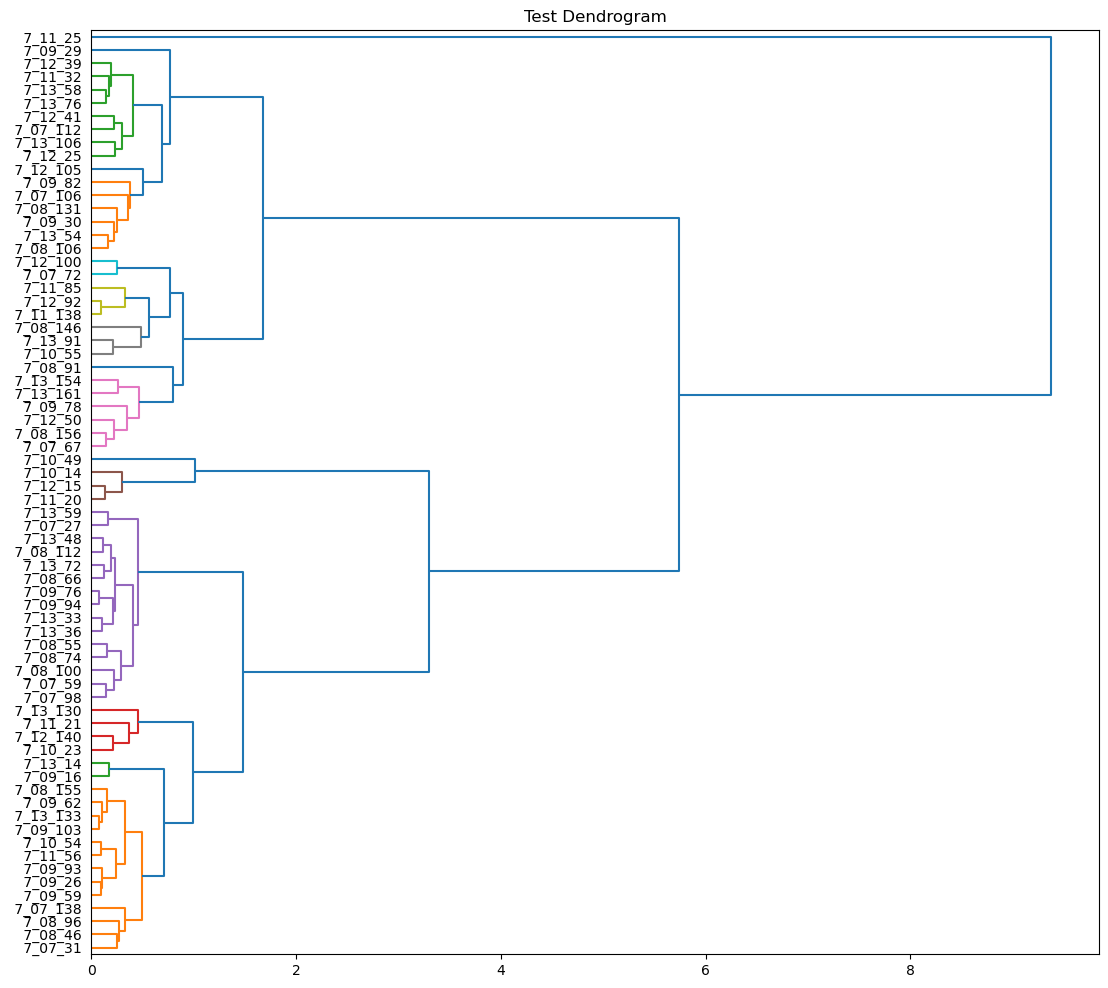

In [6]:
from processing_funcs import hierarchical_clustering

# read .csv file back into the environment
# make sure to modify the notes column for custom labels in the plot
df = pd.read_csv(df_path, na_filter=False) # added in a name to the notes column

# run hierarchical clustering (see processing_funcs.py)
hierarchical_clustering(
    df, 
    box_SA=False,
    cont_SA=True,
    avg_cont_color=True,
    hue_band=True,
    dend_title='Test Dendrogram',
    color_threshold=0.5
    
    )

[' 7_13_19',
 ' 7_13_20',
 ' 7_13_33',
 ' 7_13_40',
 ' 7_13_42',
 ' 7_13_43',
 ' 7_13_52',
 ' 7_13_53',
 ' 7_13_59',
 ' 7_13_69',
 ' 7_13_84',
 ' 7_13_86',
 ' 7_13_110',
 ' 7_12_22',
 ' 7_12_35',
 ' 7_12_41',
 ' 7_12_42',
 ' 7_12_44',
 ' 7_12_50',
 ' 7_12_71',
 ' 7_12_76',
 ' 7_12_97',
 ' 7_08_17',
 ' 7_08_25',
 ' 7_08_41',
 ' 7_08_50',
 ' 7_08_69',
 ' 7_08_70',
 ' 7_08_76',
 ' 7_08_82',
 ' 7_08_105',
 ' 7_08_131',
 ' 7_08_135',
 ' 7_09_28',
 ' 7_09_31',
 ' 7_09_32',
 ' 7_09_58',
 ' 7_09_76',
 ' 7_09_78',
 ' 7_09_92',
 ' 7_09_99',
 ' 7_07_22',
 ' 7_07_25',
 ' 7_07_44',
 ' 7_07_52',
 ' 7_07_73',
 ' 7_07_77',
 ' 7_07_81',
 ' 7_07_102',
 ' 7_10_12',
 ' 7_10_28',
 ' 7_10_34',
 ' 7_10_40',
 ' 7_11_8',
 ' 7_11_12',
 ' 7_11_19',
 ' 7_11_33',
 ' 7_11_54']